# Cifar100 İle Rastgele Seçilen 5 Classlı CNN Ağı Eğitimi

## Gerekli Kütüphanelerin Kurulumu

In [1]:
import tensorflow as tf
import keras 
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy

Using TensorFlow backend.


## Cifar100 Dataseti içerisindeki Tüm Classlar Proje İçerisinde Oluşturulan Dataset Klasörüne Eklendi.

In [2]:
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# os.mkdir('dataset')
# os.mkdir('dataset\\train')
# os.mkdir('dataset\\test')

# for i in range(100):
#     path=os.path.join('dataset\\train',str(i))
#     os.mkdir(path)
#     path=os.path.join('dataset\\test',str(i))
#     os.mkdir(path)

# import matplotlib.pyplot as plt
# for i in range(50000):
#     path='dataset/train/'+str(int(y_train[i]))+'/'+str(i)+'.png'  
#     plt.imsave(path,x_train[i])
    
# for i in range(10000):
#     path='dataset/test/'+str(int(y_test[i]))+'/'+str(i)+'.png'  
#     plt.imsave(path,x_test[i])


In [3]:
# from keras.utils import np_utils
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# x_train = x_train.reshape((50000,32*32))
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.reshape((10000,32*32))
# x_test = x_test.astype('float32')/255.0
 
# # # Convert correct answer labels of y_train,y_test to One-Hot
# # y_train = np_utils.to_categorical(y_train)
# # y_test = np_utils.to_categorical(y_test)



## Cifar100 Load Edilip İçerisinden Gerekli Classlar Çekildi.

In [4]:
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()


# # train seti işlemleri
# y_train_crab = np.count_nonzero(y_train==26)
# y_train_elephant = np.count_nonzero(y_train==31)
# y_train_forest = np.count_nonzero(y_train==33)
# y_train_pine_tree = np.count_nonzero(y_train==59)
# y_train_tiger = np.count_nonzero(y_train==88)

# print('total training crab images:', y_train_crab)
# print('total training elephant images:', y_train_elephant)
# print('total training forest images:', y_train_forest)
# print('total training pine_tree images:', y_train_pine_tree)
# print('total training tiger images:', y_train_tiger)

# # test seti işlemleri
# y_test_crab = np.count_nonzero(y_test==26)
# y_test_elephant = np.count_nonzero(y_test==31)
# y_test_forest = np.count_nonzero(y_test==33)
# y_test_pine_tree = np.count_nonzero(y_test==59)
# y_test_tiger = np.count_nonzero(y_test==88)

# print("\n**************************************************************************\n")

# print('total testing crab images:', y_test_crab)
# print('total testing elephant images:', y_test_elephant)
# print('total testing forest images:', y_test_forest)
# print('total testing pine_tree images:', y_test_pine_tree)
# print('total testing tiger images:', y_test_tiger)


# # x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
# # x_test = x_test.reshape(x_train.shape[0], 32, 32, 1)

# # convert from float32 to float64 so that both X and y have same type.
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
# y_train=to_categorical(y_train,100)
# y_test=to_categorical(y_test,100)

## Cifar100 Datasetini Proje Dosyası İçerisindeki Datasete Gerekli Klasör Oluşturularak Classlar Eklendi

In [5]:
base_dir = 'C:\\Users\\halil\\GitHub\\Deep-Learning\\Convolutional Neural Networks - CNN\\Cifar100-MultiClass\\dataset' # Ana klasör içerisindeki dataset klasörünün yolu
train_dir = os.path.join(base_dir, 'train') # dataset klasörü içerisindeki train sınıflarının yolu
test_dir = os.path.join(base_dir, 'test') # dataset klasörü içerisindeki test sınıflarının yolu


# Train (Eğitim) setindeki sınıfların klasörleri içerisindeki toplam image verileri
train_crab_dir = os.path.join(train_dir, 'crab')
train_elephant_dir = os.path.join(train_dir, 'elephant')
train_forest_dir = os.path.join(train_dir, 'forest')
train_pine_dir = os.path.join(train_dir, 'pine')
train_tiger_dir = os.path.join(train_dir, 'tiger')

print('total training crab images:', len(os.listdir(train_crab_dir)))
print('total training elephant images:', len(os.listdir(train_elephant_dir)))
print('total training forest images:', len(os.listdir(train_forest_dir)))
print('total training pine_tree images:', len(os.listdir(train_pine_dir)))
print('total training tiger images:', len(os.listdir(train_tiger_dir)))

# Test setindeki sınıfların klasörleri içerisindeki toplam image verileri
print("\n**************************************************************************\n")
test_crab_dir = os.path.join(test_dir, 'crab')
test_elephant_dir = os.path.join(test_dir, 'elephant')
test_forest_dir = os.path.join(test_dir, 'forest')
test_pine_dir = os.path.join(test_dir, 'pine')
test_tiger_dir = os.path.join(test_dir, 'tiger')

print('total testing crab images:', len(os.listdir(test_crab_dir)))
print('total testing elephant images:', len(os.listdir(test_elephant_dir)))
print('total testing forest images:', len(os.listdir(test_forest_dir)))
print('total testing pine_tree images:', len(os.listdir(test_pine_dir)))
print('total testing tiger images:', len(os.listdir(test_tiger_dir)))




total training crab images: 499
total training elephant images: 500
total training forest images: 500
total training pine_tree images: 500
total training tiger images: 500

**************************************************************************

total testing crab images: 100
total testing elephant images: 100
total testing forest images: 100
total testing pine_tree images: 100
total testing tiger images: 100


## CNN Modeli Oluşturma

In [6]:
model=Sequential()
model.add(layers.Conv2D(32,
                            (3,3),
                            activation='relu',
                            padding='same',
                            input_shape= (32, 32, 3)))
    #model.add(Activation('relu'))
model.add(layers.Conv2D(64,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
# model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(5,activation='softmax'))
model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0

##  Modeli Derleme (Compile) İşlemi

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## İmage Generator İşlemleri

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_dir='.\\dataset\\train\\'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),        
        batch_size=32,
        class_mode='categorical')

test_dir='.\\dataset\\test\\'
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),        
        batch_size=32,
        class_mode='categorical')


history = model.fit(#history = model.fit_generator(
      train_generator,
      steps_per_epoch=int(2500/32),
      epochs=25,
      validation_data=validation_generator,
      validation_steps = int(500/32) )

Found 2499 images belonging to 5 classes.
Found 499 images belonging to 5 classes.
Epoch 1/25
78/78 [==============================] - 5s 33ms/step - loss: 1.5527 - acc: 0.2900 - val_loss: 1.3431 - val_acc: 0.3792
Epoch 2/25
78/78 [==============================] - 2s 21ms/step - loss: 1.3107 - acc: 0.4505 - val_loss: 1.2125 - val_acc: 0.4625
Epoch 3/25
78/78 [==============================] - 2s 20ms/step - loss: 1.1799 - acc: 0.5210 - val_loss: 1.1674 - val_acc: 0.5083
Epoch 4/25
78/78 [==============================] - 2s 20ms/step - loss: 1.0734 - acc: 0.5613 - val_loss: 1.0484 - val_acc: 0.5917
Epoch 5/25
78/78 [==============================] - 1s 19ms/step - loss: 1.0196 - acc: 0.5973 - val_loss: 1.0697 - val_acc: 0.5583
Epoch 6/25
78/78 [==============================] - 1s 19ms/step - loss: 0.9801 - acc: 0.6015 - val_loss: 0.9667 - val_acc: 0.6333
Epoch 7/25
78/78 [==============================] - 2s 20ms/step - loss: 0.9404 - acc: 0.6296 - val_loss: 0.9914 - val_acc: 0.6062


In [19]:
model.evaluate(train_generator)

79/79 [==============================] - 1s 15ms/step - loss: 0.5026 - acc: 0.8167


[0.5025795698165894, 0.8167266845703125]

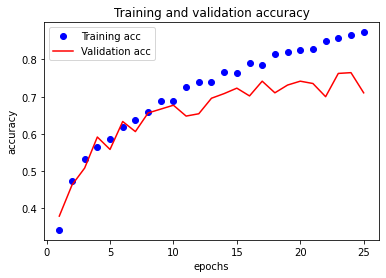

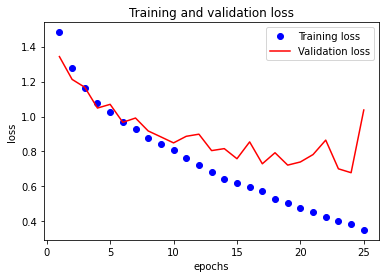

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# import numpy as np

np.save('history.npy',(acc,val_acc,loss,val_loss))
(acc,val_acc,loss,val_loss)=np.load('history.npy')

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()





In [11]:
validation_generator.class_indices

{'crab': 0, 'elephant': 1, 'forest': 2, 'pine': 3, 'tiger': 4}

## Tahmin İşlemleri

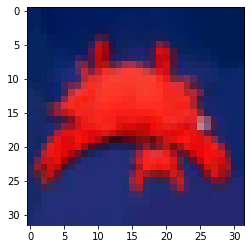

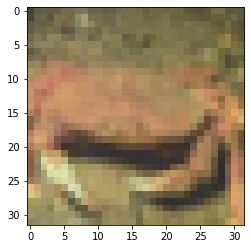

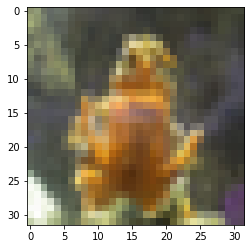

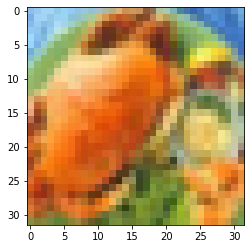

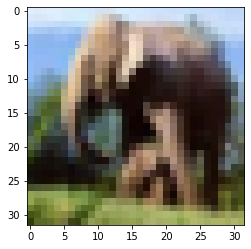

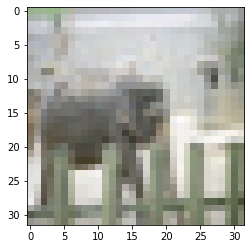

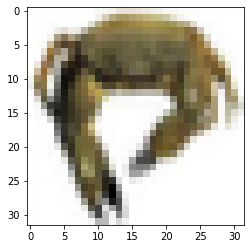

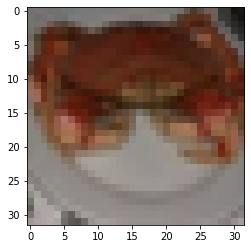

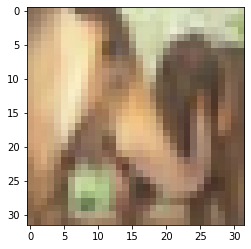

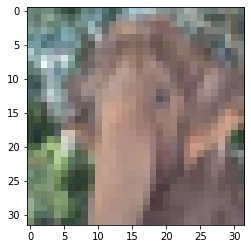

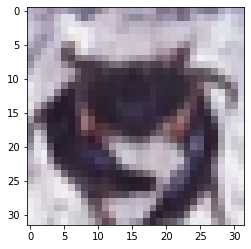

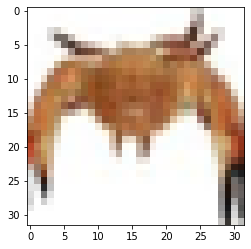

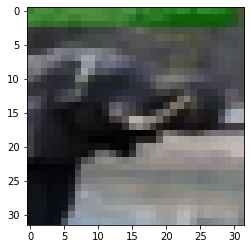

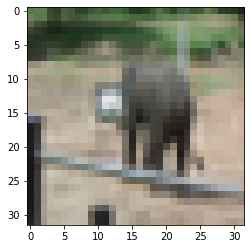

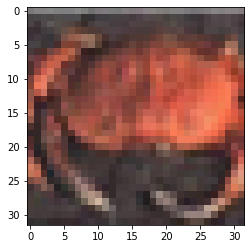

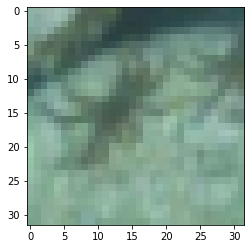

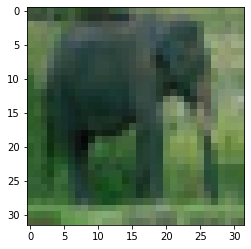

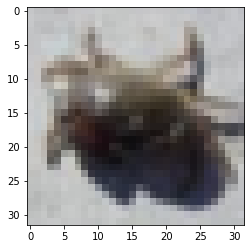

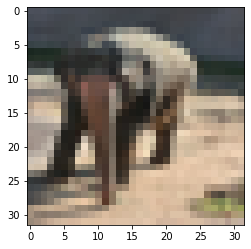

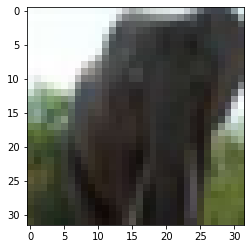

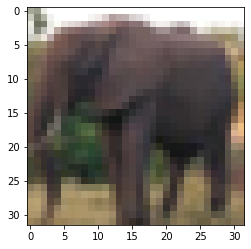

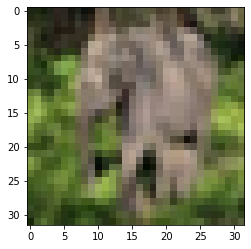

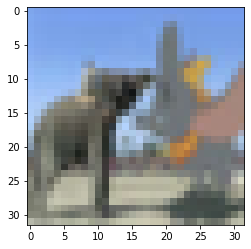

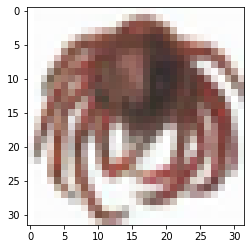

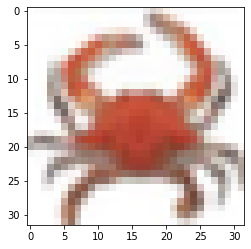

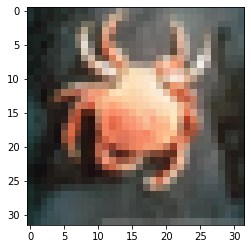

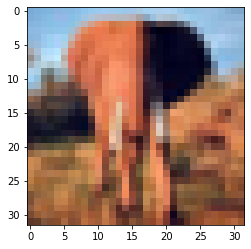

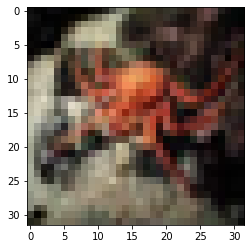

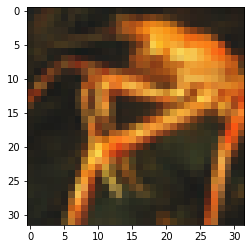

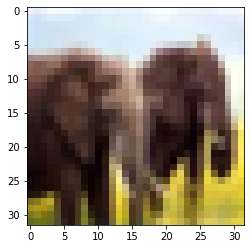

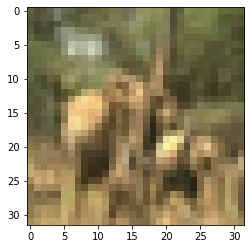

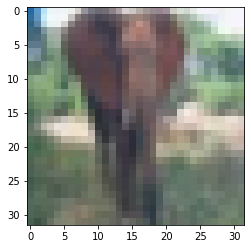

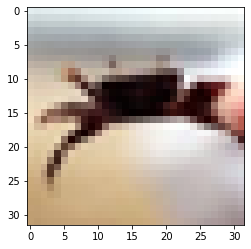

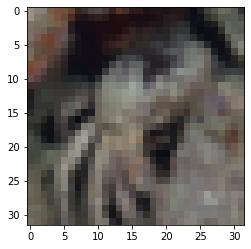

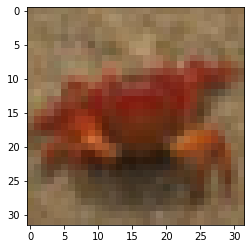

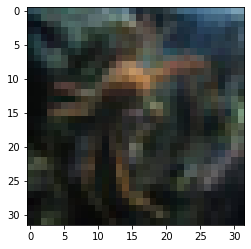

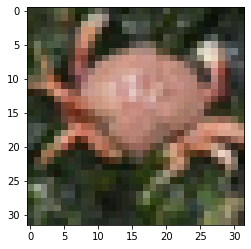

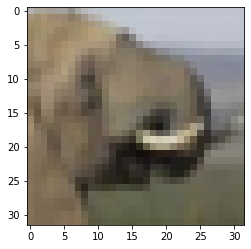

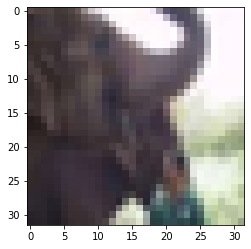

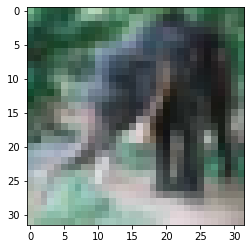

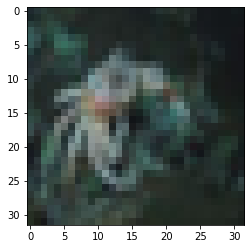

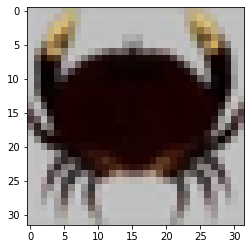

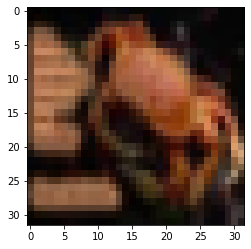

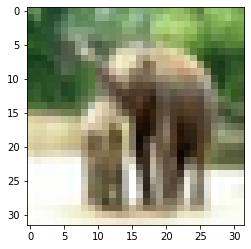

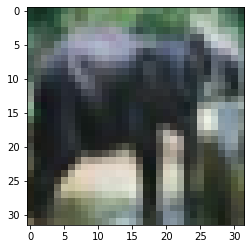

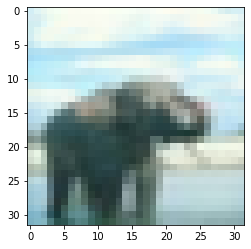

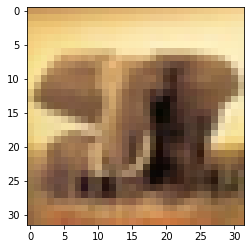

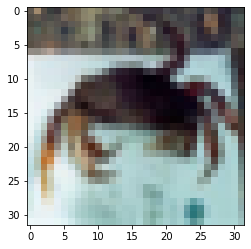

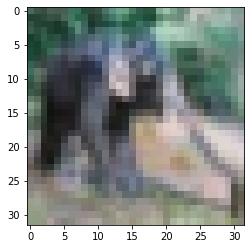

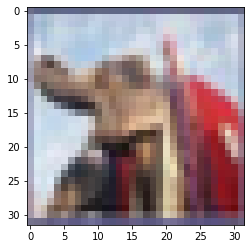

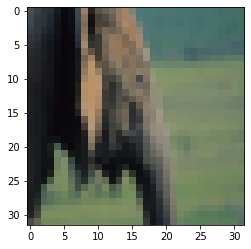

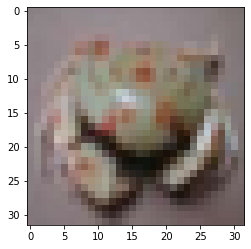

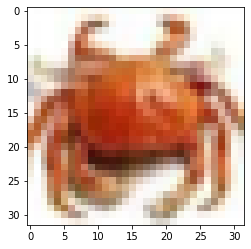

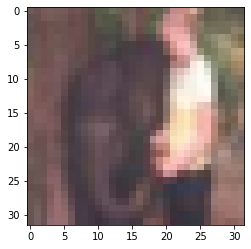

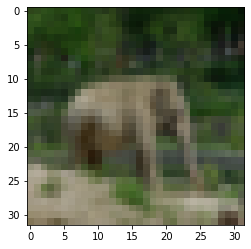

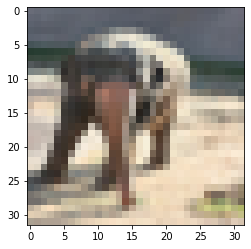

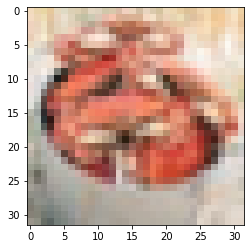

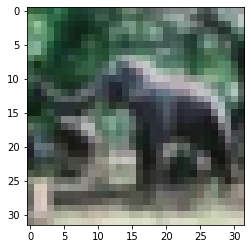

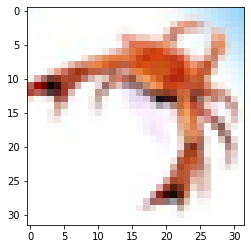

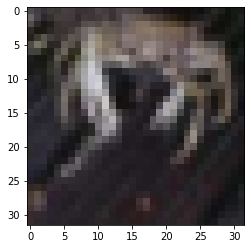

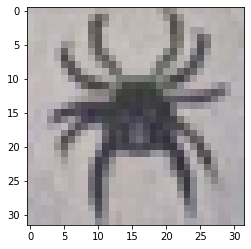

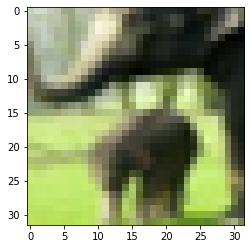

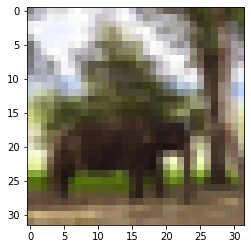

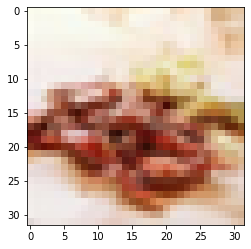

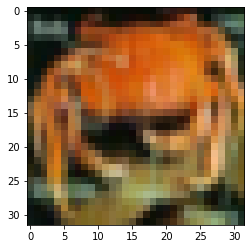

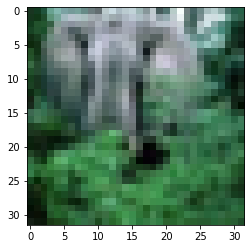

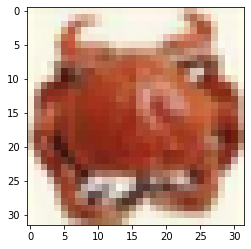

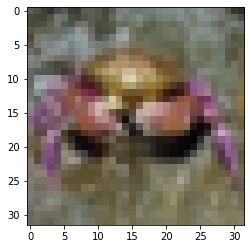

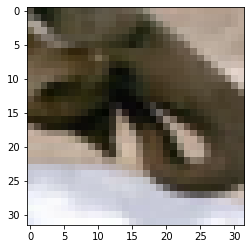

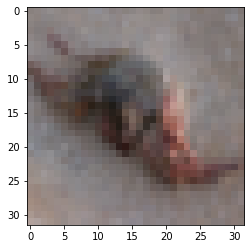

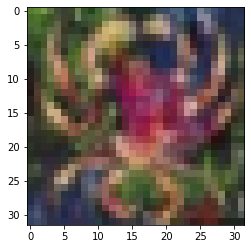

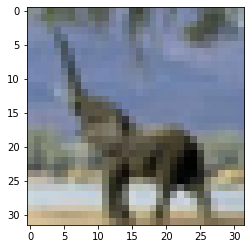

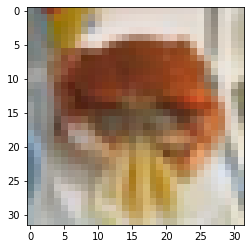

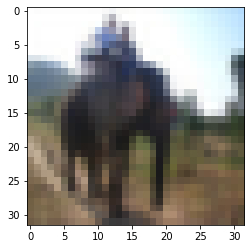

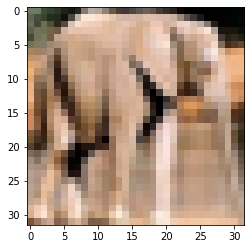

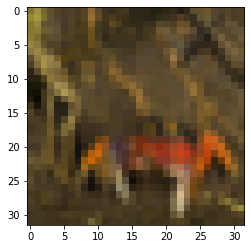

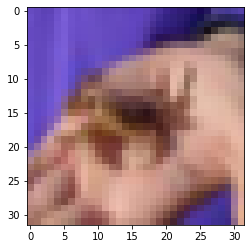

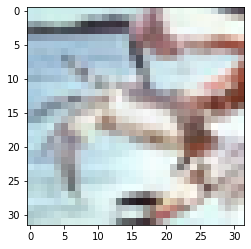

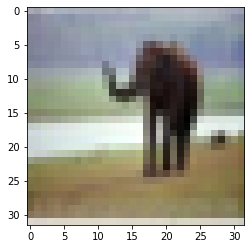

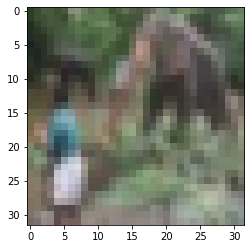

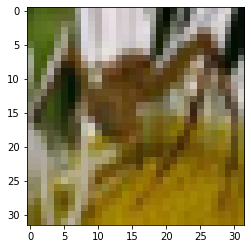

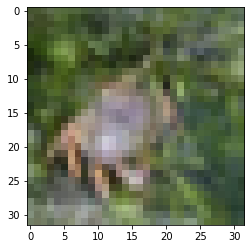

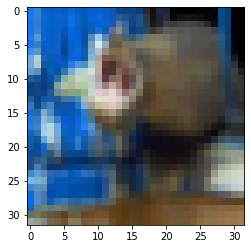

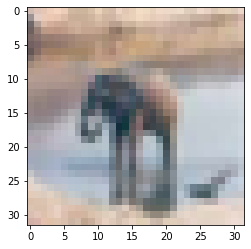

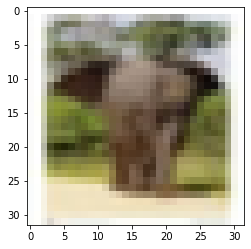

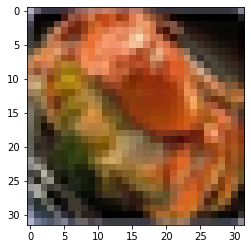

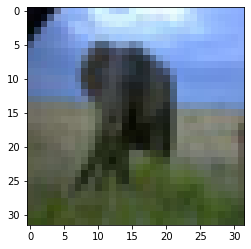

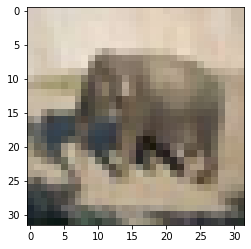

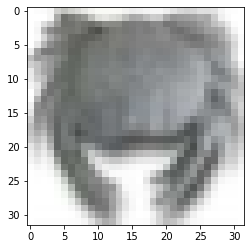

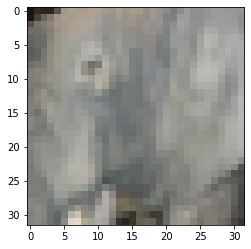

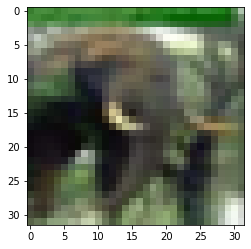

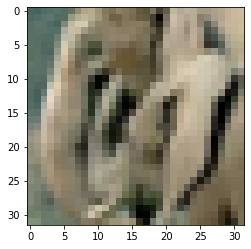

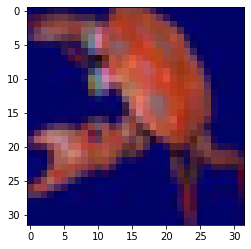

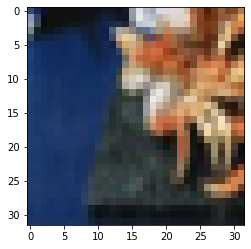

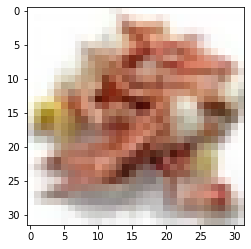

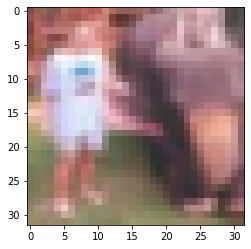

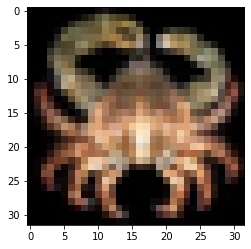

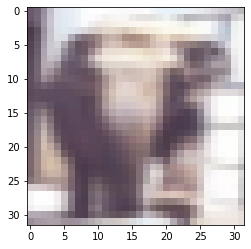

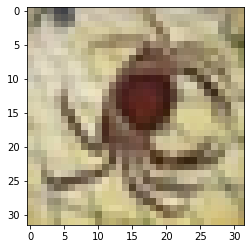

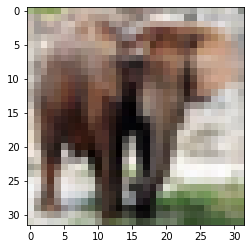

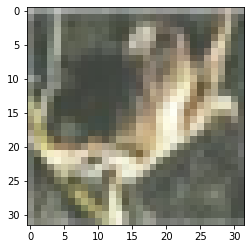

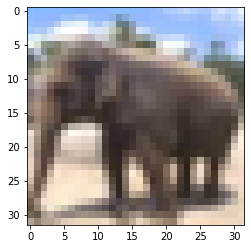

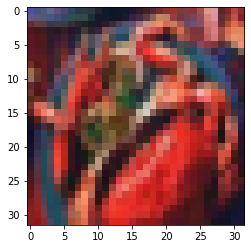

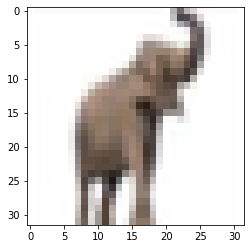

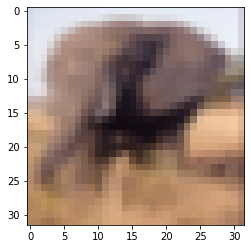

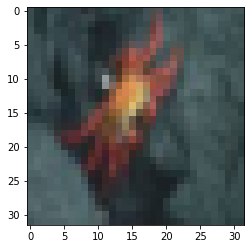

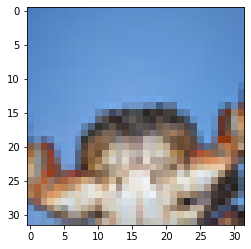

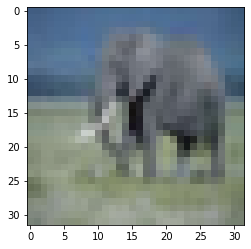

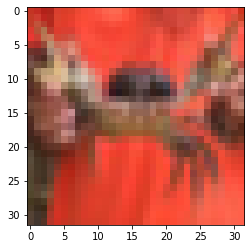

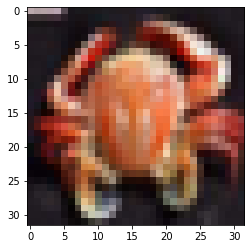

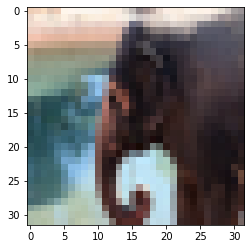

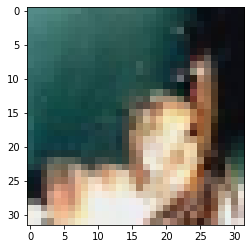

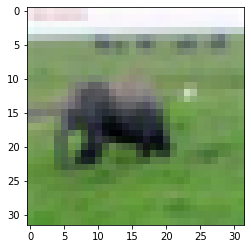

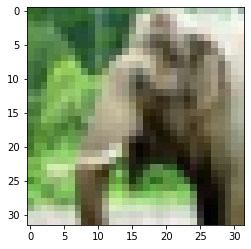

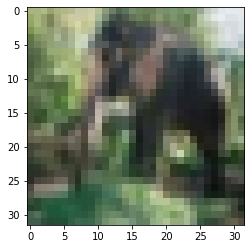

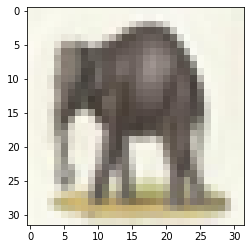

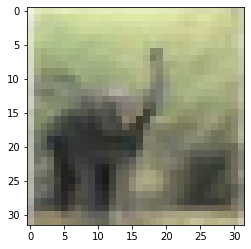

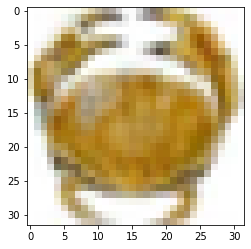

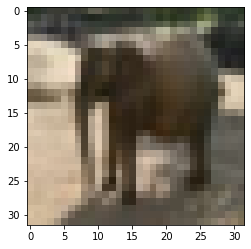

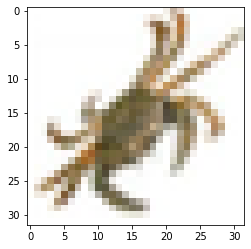

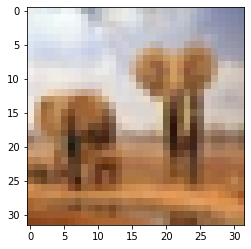

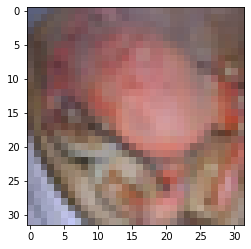

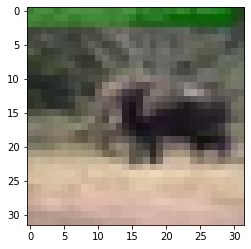

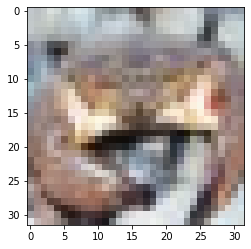

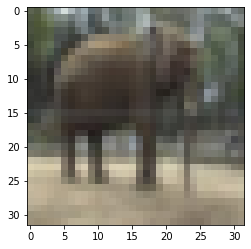

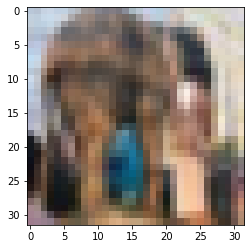

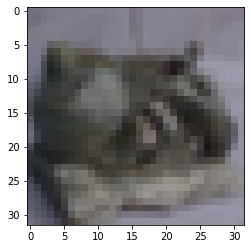

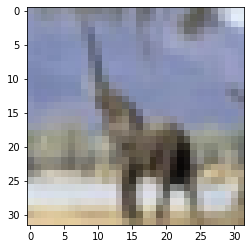

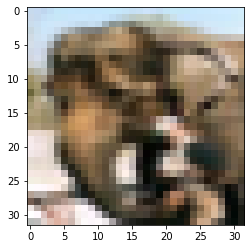

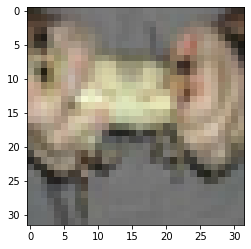

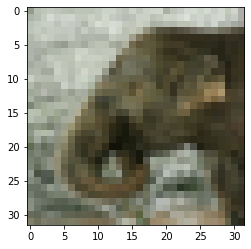

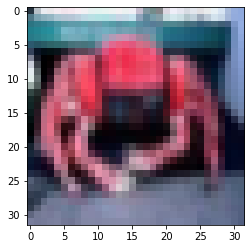

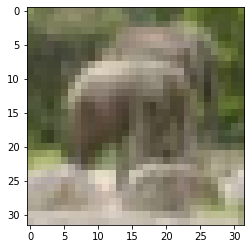

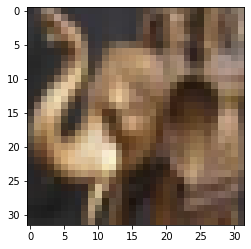

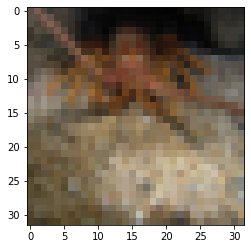

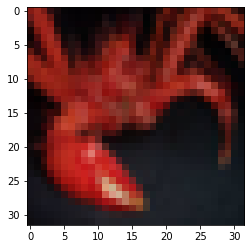

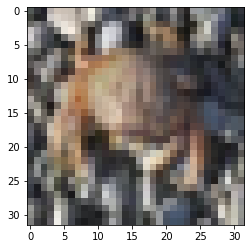

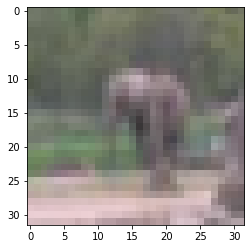

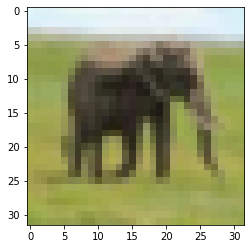

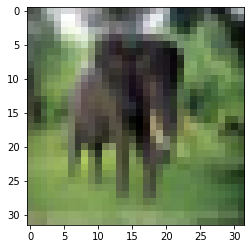

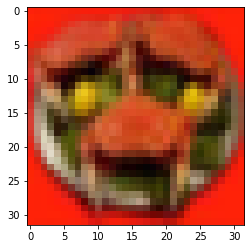

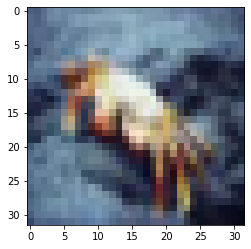

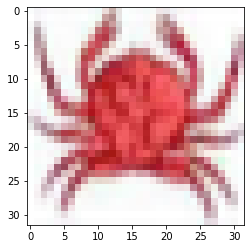

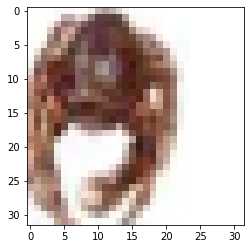

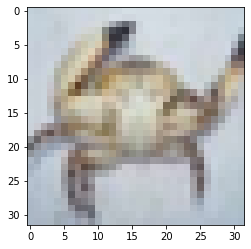

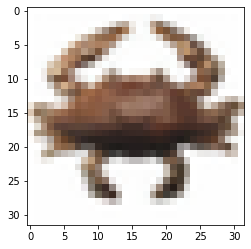

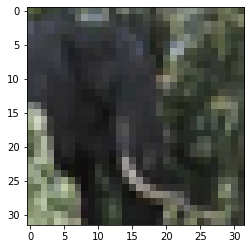

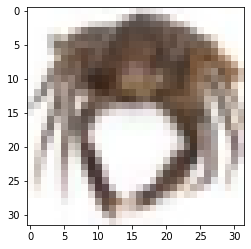

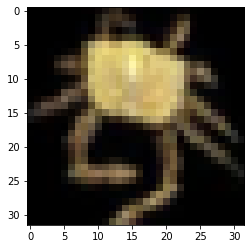

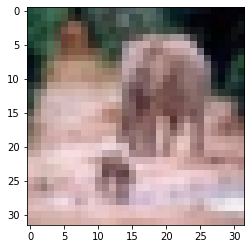

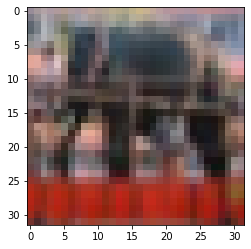

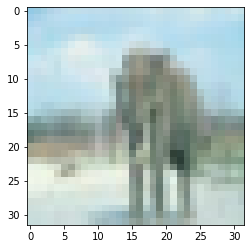

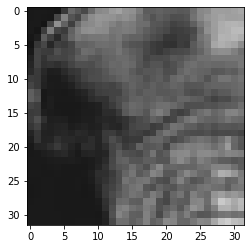

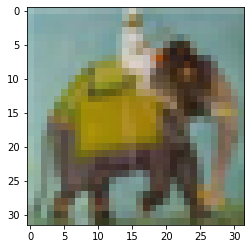

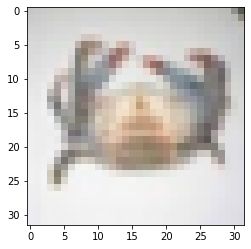

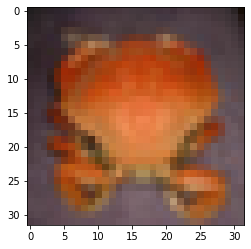

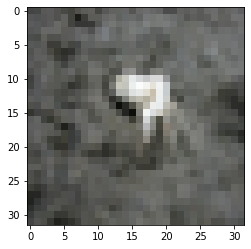

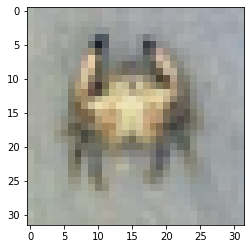

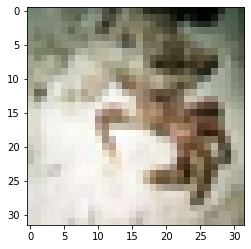

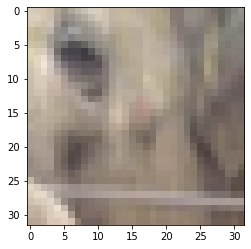

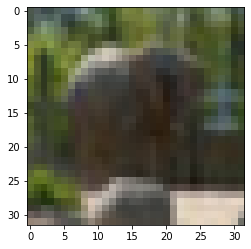

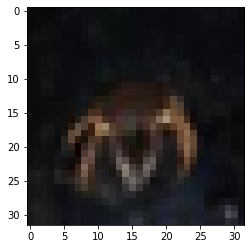

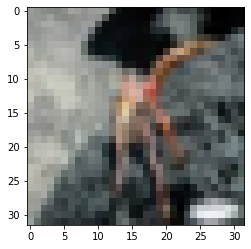

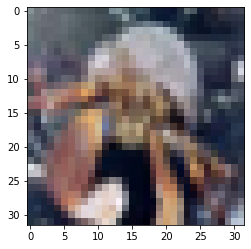

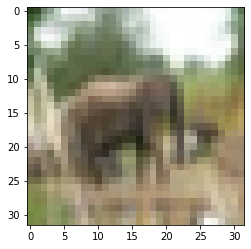

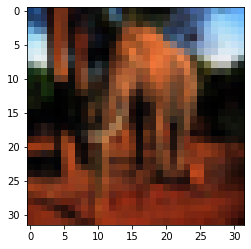

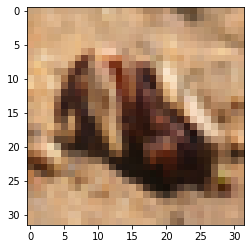

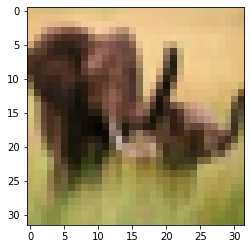

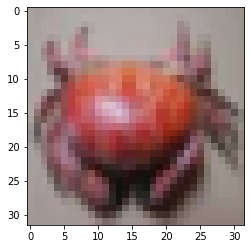

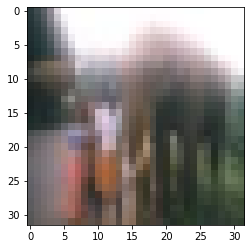

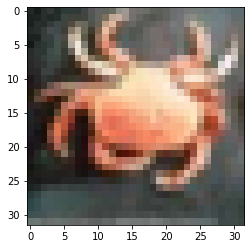

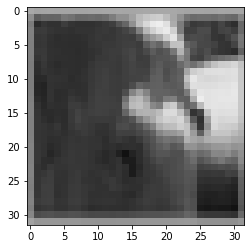

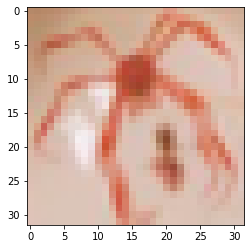

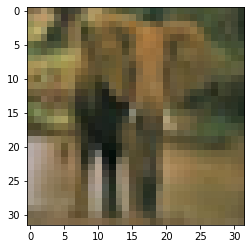

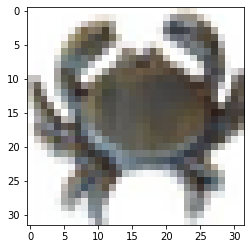

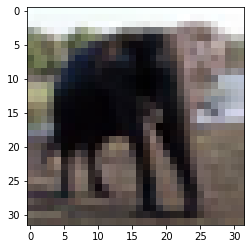

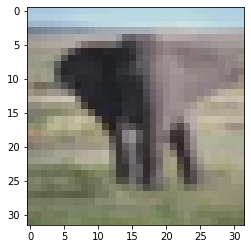

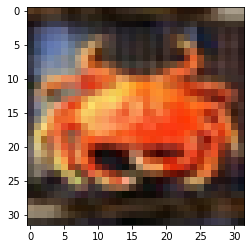

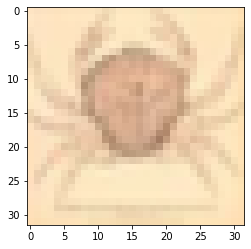

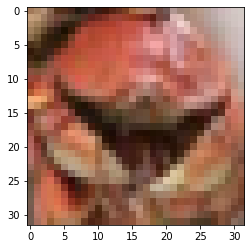

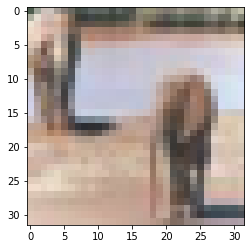

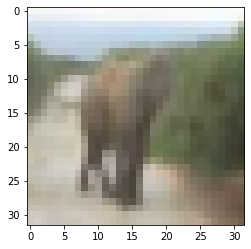

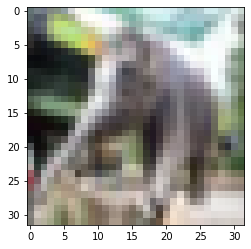

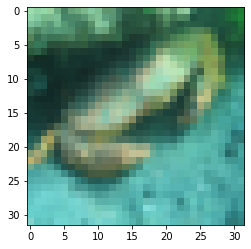

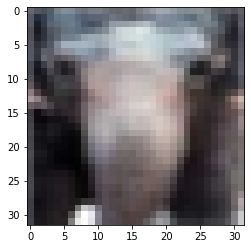

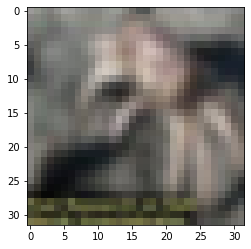

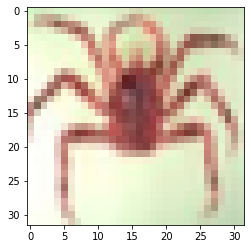

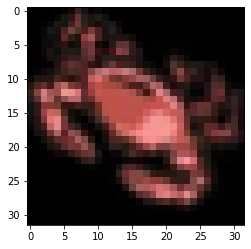

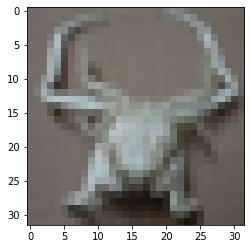

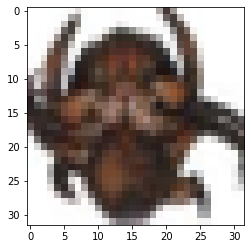

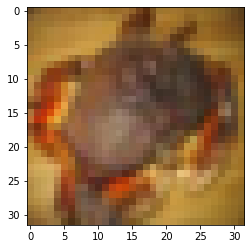

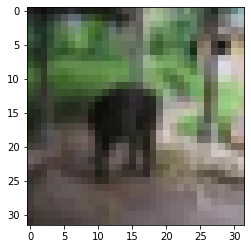

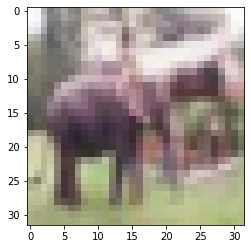

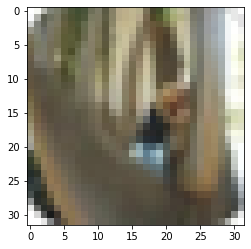

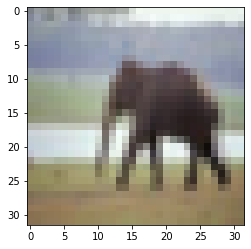

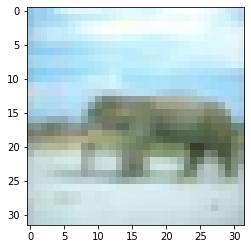

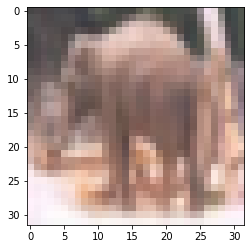

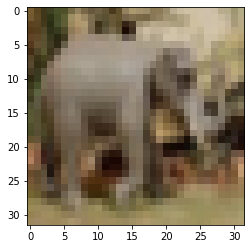

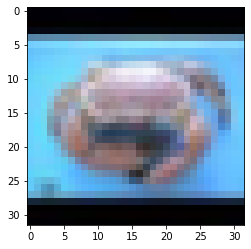

In [16]:
dir_path = 'dataset/validation'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + "//"+ i, target_size = (32,32))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)


In [58]:
# from tensorflow.keras.preprocessing import image
# # test_image from the test set.
# test_image = y_test_crab
# print(test_image)
# img = image.load_img(test_image, target_size=(32, 32))
# x = image.img_to_array(img)
# test_image = np.expand_dims(x, axis = 0)
# result = model.predict(test_image)
# import matplotlib.pyplot as plt
# plt.imshow(test_image)


In [79]:
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
Xnew = scalar.transform(Xnew)
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

NameError: name 'make_blobs' is not defined

In [77]:
model=Sequential()
model.add(layers.Conv2D(32,
                            (3,3),
                            activation='relu',
                            padding='same',
                            input_shape= (32, 32, 3)))
    #model.add(Activation('relu'))
model.add(layers.Conv2D(64,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(128,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(256,
                            (3,3),
                            padding='same',
                            activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5,activation='softmax'))
model.summary();



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 256)       

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator( 
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

# train_dir='.\\dataset\\train'
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),        
        batch_size=32,
        class_mode='categorical')

# test_dir='.\\dataset\\test'
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(32, 32),        
        batch_size=32,
        class_mode='categorical')


history = model.fit(#history = model.fit_generator(
      train_generator,
      steps_per_epoch=int(2500/32),
      epochs=25,
      validation_data=validation_generator,
      validation_steps = int(500/32))

Found 2499 images belonging to 5 classes.
Found 504 images belonging to 5 classes.
Epoch 1/25
78/78 [==============================] - 5s 48ms/step - loss: 1.5933 - acc: 0.2310 - val_loss: 1.4799 - val_acc: 0.2896
Epoch 2/25
78/78 [==============================] - 4s 46ms/step - loss: 1.4729 - acc: 0.3327 - val_loss: 1.4095 - val_acc: 0.3688
Epoch 3/25
78/78 [==============================] - 3s 44ms/step - loss: 1.3839 - acc: 0.4222 - val_loss: 1.3398 - val_acc: 0.4125
Epoch 4/25
78/78 [==============================] - 3s 45ms/step - loss: 1.3395 - acc: 0.4441 - val_loss: 1.2237 - val_acc: 0.5208
Epoch 5/25
78/78 [==============================] - 6s 72ms/step - loss: 1.3130 - acc: 0.4626 - val_loss: 1.1616 - val_acc: 0.5646
Epoch 6/25
78/78 [==============================] - 4s 47ms/step - loss: 1.2596 - acc: 0.4851 - val_loss: 1.1518 - val_acc: 0.5458
Epoch 7/25
78/78 [==============================] - 3s 44ms/step - loss: 1.2370 - acc: 0.5028 - val_loss: 1.1592 - val_acc: 0.5396


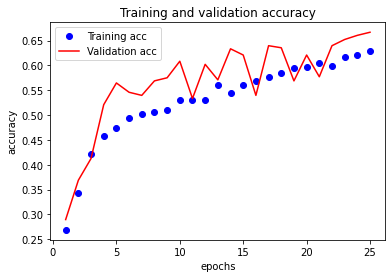

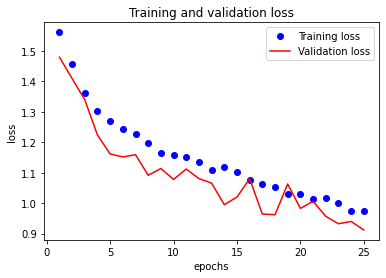

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# import numpy as np

np.save('history1.npy',(acc,val_acc,loss,val_loss))
(acc,val_acc,loss,val_loss)=np.load('history1.npy')

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()
